In [129]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

In [130]:
def plotseird(t, colors, **kwargs):
  f, ax = plt.subplots(1,1,figsize=(10, 6))

  for metric_name, metric_values in kwargs.items():
    color = colors.get(metric_name, 'b')
    ax.plot(t, metric_values, color, alpha=0.8, linewidth=2.5, label=metric_name)

  ax.set_xlabel('Time (days)', labelpad = 12)
  # ax.set_ylabel('Population', labelpad = 35)
  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.6)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.savefig('last.png')
  plt.show()

In [131]:
def deriv(y, t, betta0, gamma, N0, fi, g, lmb, T, k, eps, alph, e, H):
    S, I, R, D, M, P = y
    
    dPdt = g * D - lmb * P                        #2.1f
    
    betta = betta0 * (e ** (-eps * T)) * abs(1+alph * H) * abs((1 - dPdt / N0) ** k)
    dSdt = (-betta / N0) * I * S                  #2.1a
    dIdt = (betta / N0) * S * I - (gamma * I)     #2.1b
    dRdt = (1 - fi) * I * gamma                   #2.1c
    dDdt = fi * gamma * I - g * D                 #2.1d
    dMdt = g * D                                  #2.1e
    
    N = dSdt + dIdt + dRdt + dDdt + dMdt
    return dSdt, dIdt, dRdt, dDdt, dMdt, dPdt

In [132]:
def get_report(deriv, S0, betta0, gamma, N0, fi, g, lmb, T, k, eps, alph, e, H, I0, R0, D0, M0, P0):
  t = np.linspace(0, 364, 365) # Grid of time points (in days)
  y0 = S0, I0, R0, D0, M0, P0

  # Integrate the SIR equations over the time grid, t.
  ret = odeint(deriv, y0, t, args=(betta0, gamma, N0, fi, g, lmb, T, k, eps, alph, e, H))
  S, I, R, D, M, P = ret.T

  COLORS_MAP = {
    "Susceptible" : '-.b',
    "Infected": 'r',
    "Recovered": '--g',
    "Cumulative": 'm',
    "Population": "violet",
    "Dead": "-.k"
  }
  plotseird(t, colors = COLORS_MAP, Infected = I, Dead = D)
  plotseird(t, colors = COLORS_MAP, Infected = I, Recovered = R, Susceptible = S)

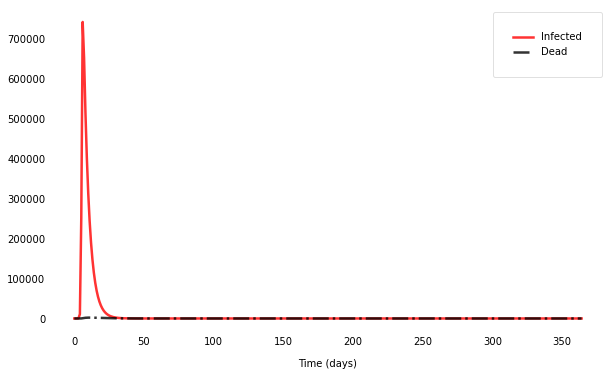

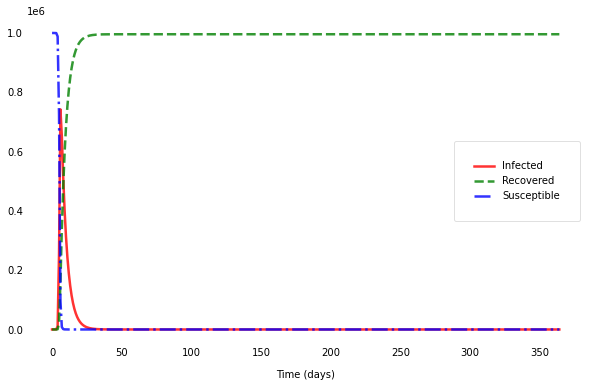

In [133]:
parameters = dict(
    betta0 = 1,             # Базовая скорость передачи
    gamma = 1/4,            # Cредний инфекционный период gamma = 4 / 8.,
    N0 = 1000000,           # Общее число населения
    fi = 0.0043,            # Доля смертности
    g = 1/8,                # Cреднее время от потери инфекционности до смерти 
    lmb = 1/11.2,           # Cредняя продолжительность общественной реакции
    T = 10,                 # Температура
    k = 695.1,              # Скорость реагирования
    eps = 0.016,            # Интенсивность влияния изменения температуры.
    alph = 0.130,           # Сила правительственных действий
    e = 1,                  #
    H = 21,                 #
    
    S0 = 1000000,           # Количество восприимчивых
    I0 = 0.01,              # Инфицированные
    R0 = 0,                 # Выздоровевшие 
    D0 = 0,                 # Больше не инфекционные, идут на поправку
    M0 = 0,                 # Умерли от болезни
    P0 = 0                  # Общественное восприятие риска
    
)
get_report(deriv, **parameters)